# Gaussian Noise 

Add gaussian noise using numpy.random.normal
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 

In [23]:
import pandas as pd

In [24]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()

In [25]:
mu, sigma = 1, 0.1
s = np.random.normal(mu, sigma, 1000)

In [26]:
abs(mu - np.mean(s))

0.001036254497132405

In [27]:
abs(sigma - np.std(s, ddof=1))

0.001478509949820711

### Display the histogram of the samples, along with the probability density function:



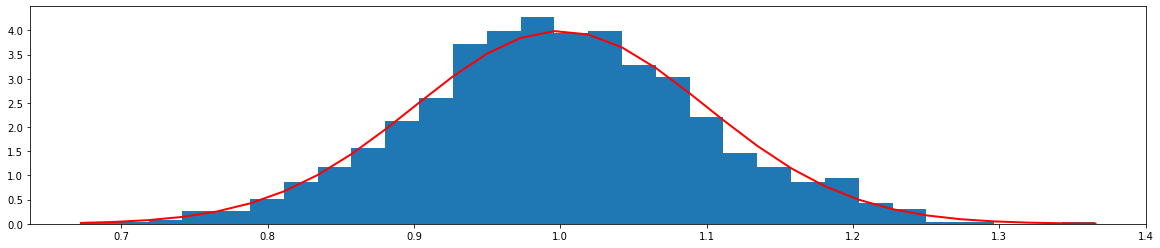

In [28]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# S1 No Volatility

In [29]:
file_names = []

df = pd.read_csv ("../datasets/s1_no_vol.csv", nrows=10)
df.drop(columns=df.columns[:1],axis=1, inplace=True)

In [30]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 4)

Populating the interactive namespace from numpy and matplotlib


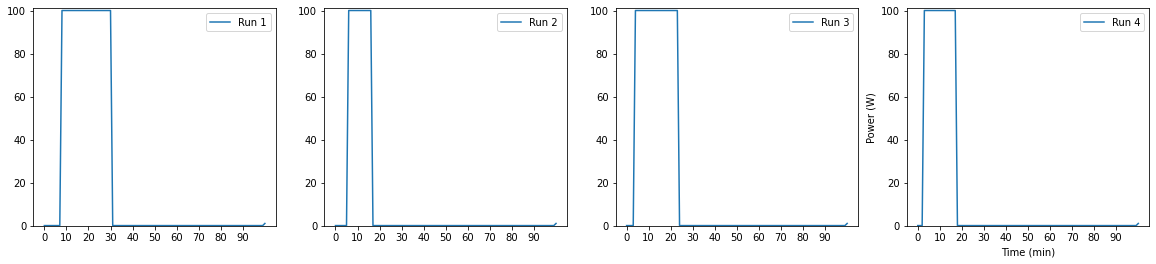

In [31]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(df.columns,df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-0.1, 100+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")
    

# S1 With Noise

In [32]:
# make a copy of df
noise_df = df.copy()

In [33]:
num_cols = len(df.columns)

In [34]:
num_runs = len(df.index)

In [35]:
mu, sigma = 1, 0.1

In [36]:
for run in range(num_runs):
    noise = (rng.normal(mu, sigma, num_cols))
    noise_df.iloc[run] = noise_df.iloc[run] + noise

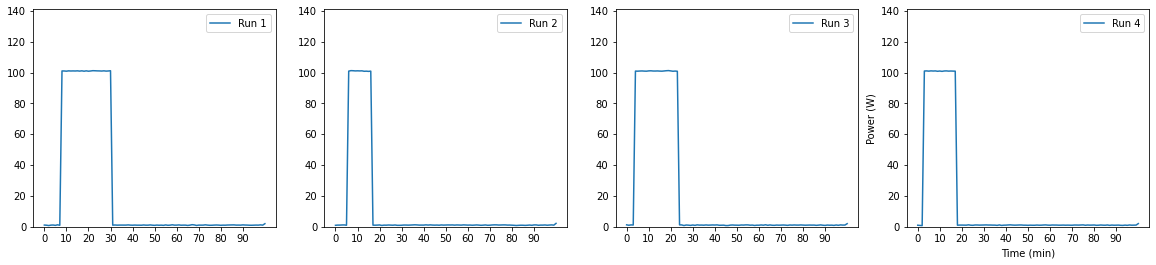

In [37]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(noise_df.columns,noise_df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-0.1, 140+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")

# S1 With Randomness

Reference material used to help create randomness generator:  
https://stackoverflow.com/questions/64074698/how-to-add-5-gaussian-noise-to-the-signal-data

In [38]:
# make a copy of df
vol_df = df.copy()

In [39]:
percentage = 0.025
cols = len(df.columns)
for run in range(num_runs):
    # noise = (rng.normal(mu, sigma, num_cols))
    noise =  np.random.normal(0, vol_df.iloc[run,:].std(), cols) * percentage
        
    # Return random integers from low (inclusive) to high (exclusive).
    # Chooses values -1, 0 and 1     
    # vals = np.random.randint(-1, 2, size=num_cols)
    
    vol_df.iloc[run] = vol_df.iloc[run] + noise

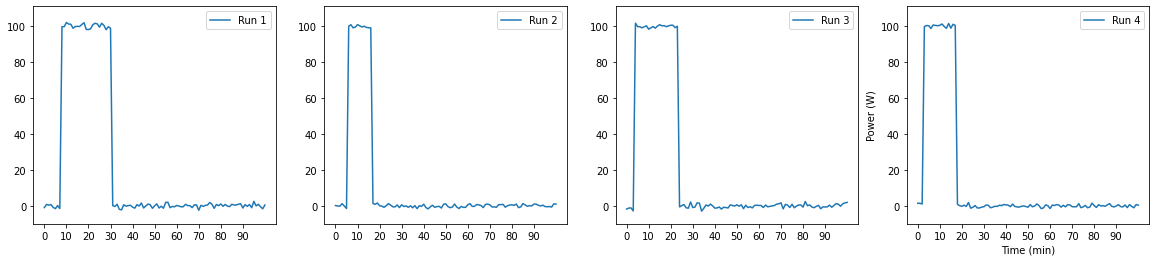

In [40]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(vol_df.columns,vol_df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-10, 110+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")

# Clean the DF

If above 100, set to 100  
If below 0, set to 0  

In [41]:
vol_df[vol_df > 100] = 100
vol_df[vol_df < 0] = 0 

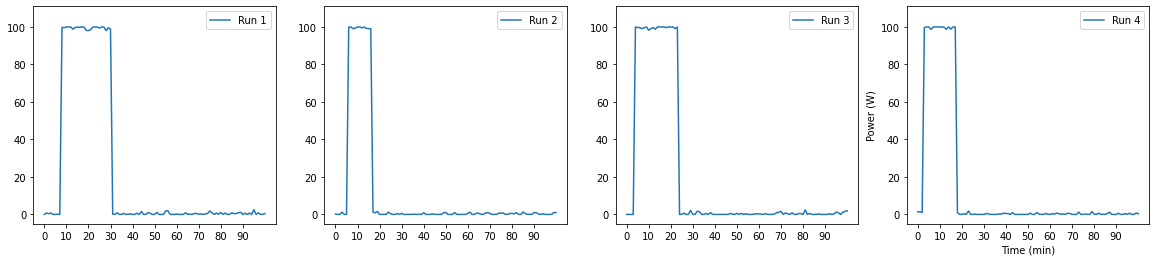

In [42]:
fig, axs = plt.subplots(1,4)

for i in range(4):
    axs[i].plot(vol_df.columns,vol_df.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-5, 110+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")

# Graphing the Created DataFrames

In [48]:
import pandas as pd
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_nested_to_2d_array
)

# Define file names to use for classification
file_names = ["s1_w_vol", "s2_w_vol", "s3_w_vol", "s4_w_vol"]

# Get df from file and store in combined_df and y
# Specify number of rows to use in classifcation
dfs = []
y = []
for file_name in file_names:
    df = pd.read_csv("../datasets/w_vol_and_rand/" + file_name + ".csv", nrows=1000)
    y.extend([file_name[1]] * df.shape[0])
    dfs.append(df)

num_runs = len(df.index)
y = np.asarray(y)
combined_df = pd.concat(dfs)

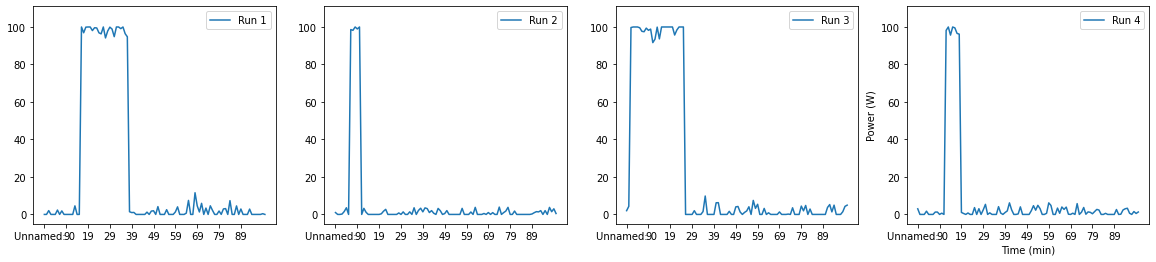

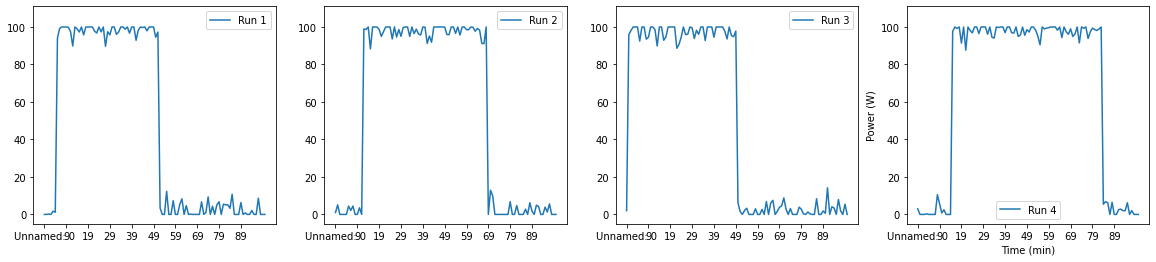

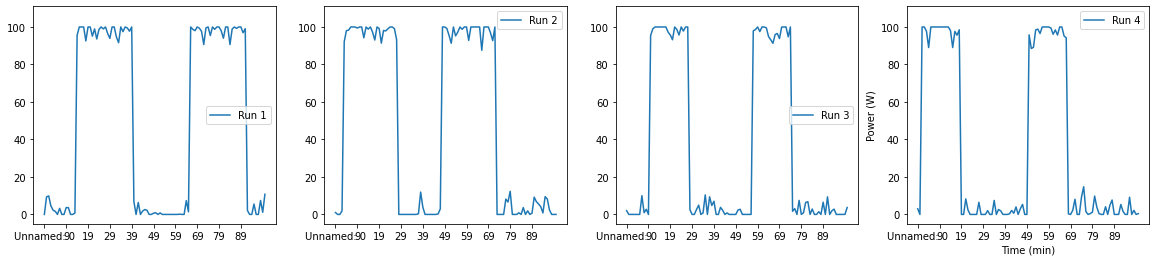

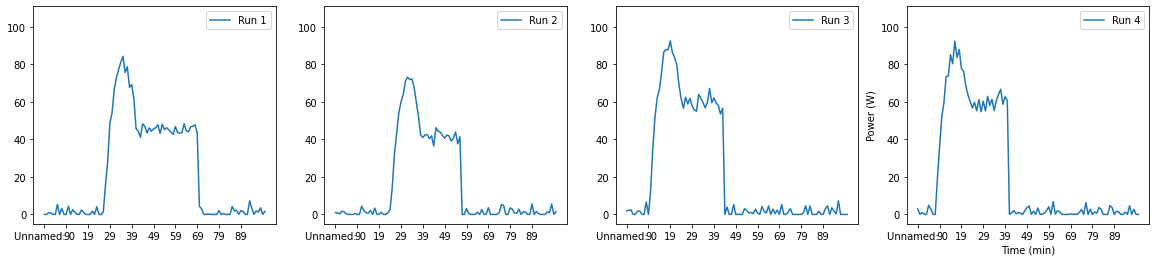

In [49]:
fig, axs = plt.subplots(1,4)

to_graph = combined_df.copy()

# S1
for i in range(4):
    axs[i].plot(to_graph.columns,to_graph.iloc[i,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-5, 110+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")
 
fig, axs = plt.subplots(1,4) 
# S2
for i in range(4):
    axs[i].plot(to_graph.columns,to_graph.iloc[i+num_runs,:], label = "Run "+str(i+1))

    axs[i].set_ylim([-5, 110+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")
    
fig, axs = plt.subplots(1,4) 

for i in range(4):
    axs[i].plot(to_graph.columns,to_graph.iloc[i+(num_runs*2),:], label = "Run "+str(i+1))

    axs[i].set_ylim([-5, 110+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")
    
fig, axs = plt.subplots(1,4) 

for i in range(4):
    axs[i].plot(to_graph.columns,to_graph.iloc[i+(num_runs*3),:], label = "Run "+str(i+1))

    axs[i].set_ylim([-5, 110+1])
    axs[i].set_xticks(np.arange(0, 100, 10))
    axs[i].legend()
    plt.xlabel("Time (min)")
    plt.ylabel("Power (W)")